In [1]:
%matplotlib inline

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

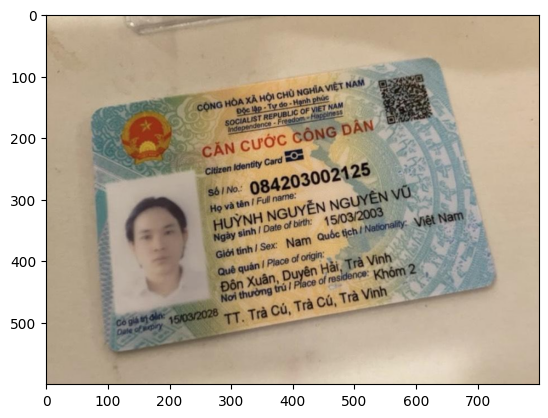

In [4]:
IMG_PATH = './test_img2.jpg'

img = cv2.imread(IMG_PATH, cv2.IMREAD_COLOR)
img = cv2.resize(img, (800, 600))

plt.imshow(img[:,:,::-1])

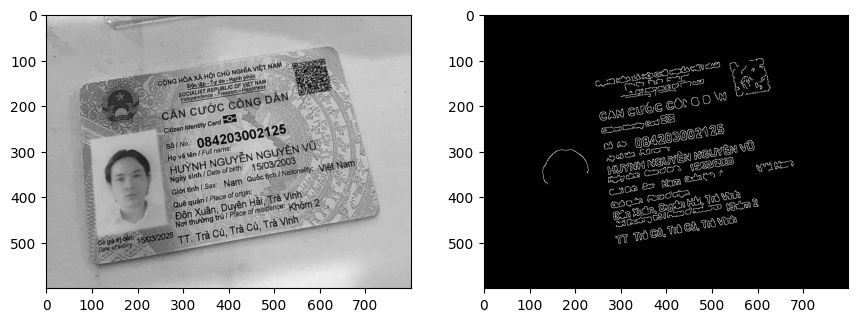

In [10]:
def preprocessing_img(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    

    smoothed_image = cv2.GaussianBlur(gray_img, (7, 7), 0)
    sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened_image = cv2.filter2D(gray_img, -1, sharpen_kernel)

    alpha = 0.5  # weight of sharpened
    beta = 0.5   # weight of smoothed

    enhanced = cv2.addWeighted(sharpened_image, alpha, smoothed_image, beta, 0)

    edges = cv2.Canny(smoothed_image, 100, 200)

    plt.figure(figsize=(16, 12))
    plt.subplot(1, 3, 1)
    plt.imshow(enhanced, cmap='gray')

    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')

    # plt.subplot(1, 3, 2)
    # plt.imshow(edges, cmap='gray')

preprocessing_img(img)